# College Admission Classification Example

Import libraries

In [3]:
import numpy as np   # to manipulate arrays
import pandas as pd  # to load data (csv file)
import matplotlib.pyplot as plt   # to plot
from sklearn import linear_model  # for linear regression 

Read the data from the csv file   

In [13]:
# The data is already loaded in CELL INDEX: 14, so this line is not needed.
# You can load your file with numpy :

# f= open("regression-example-data.csv")
# data = np.loadtxt(f, delimiter=";")
# print(data)

# Or with pandas. In may case I used pandas to set the decimal separator (My file comes from excel)

df = pd.read_csv("College Admission Scores.csv", delimiter=";")


Plot the data

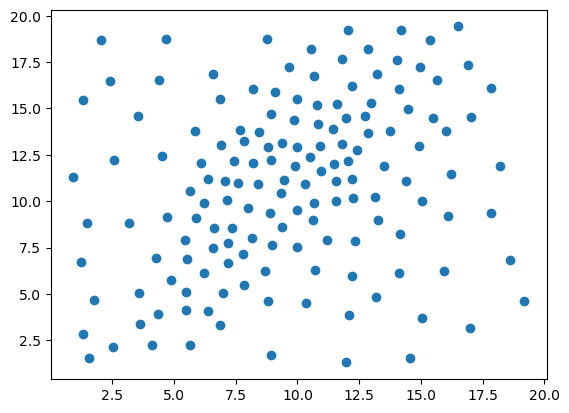

In [16]:
x = df['Exam1']
y = df['Exam2']

plt.scatter(x, y)

Calculatre the decision boundary based on the mean of the two exams

In [21]:

decision_boundary = (df['Exam1'] + df['Exam2']) / 2 > 10
decision = decision_boundary.astype(int)


Plot the data and color it using your calculated decision 

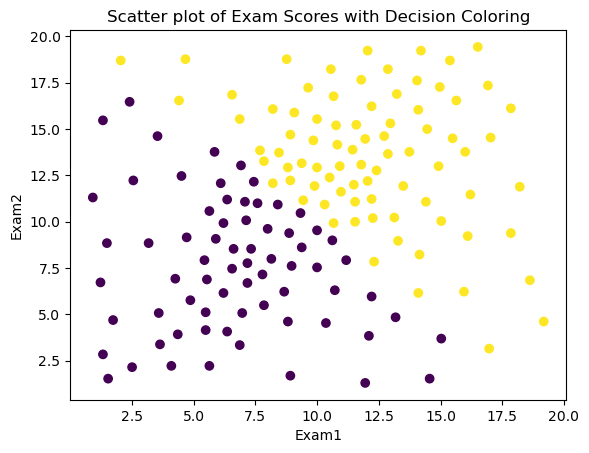

In [22]:

plt.scatter(df['Exam1'], df['Exam2'], c=decision, cmap='viridis')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Scatter plot of Exam Scores with Decision Coloring')
plt.show()


Use a meshgrid to visualize the decision boundary as two spaces


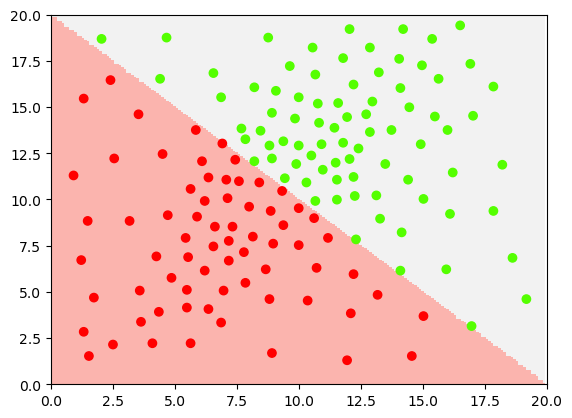

In [24]:
x_min, x_max = 0, 20
y_min, y_max = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = (xx.ravel()+ yy.ravel()) / 2 > 10
Z = Z.reshape(xx.shape)
cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")

plt.axis([0, 20, 0, 20])
plt.scatter(df['Exam1'], df['Exam2'], c = decision, cmap="prism")
plt.show()

Now, load the data file 'College Admission Scores and Decisions.csv'

In [28]:
data = pd.read_csv('College Admission Scores and Decisions.csv', delimiter=";")


Make the same previous plot by replacing the color of your points by the decision data

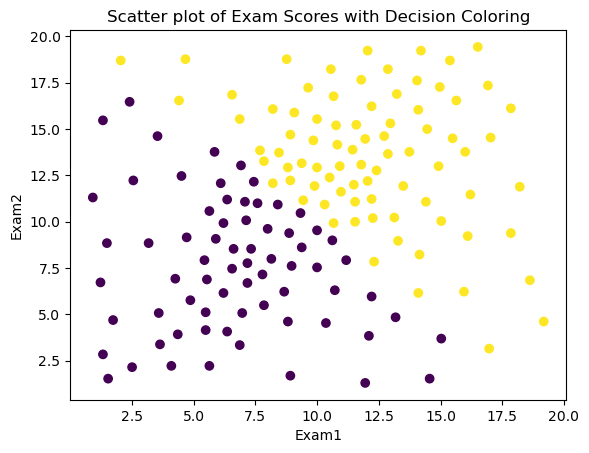

In [29]:
plt.scatter(data['Exam1'], data['Exam2'], c=decision, cmap='viridis')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Scatter plot of Exam Scores with Decision Coloring')
plt.show()


# Linear Discriminant Analysis

Create an LDA classifier and fit it over your data

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the LDA classifier over the data
X = data[['Exam1', 'Exam2']]
y = data['Decision']
lda.fit(X, y)


LinearDiscriminantAnalysis()

Use a meshgrid to visualize the decision boundary of your LDA Classifier

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


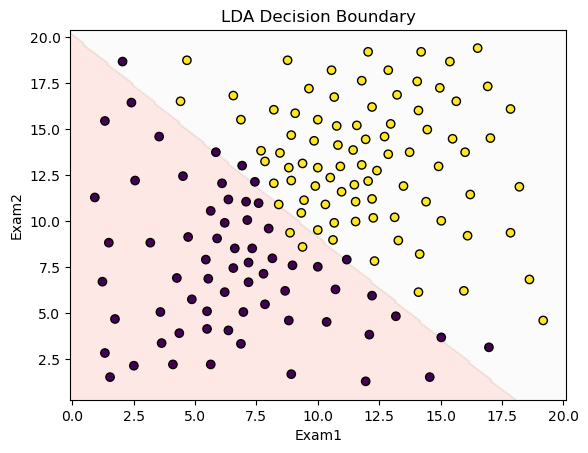

In [31]:
x_min, x_max = X['Exam1'].min() - 1, X['Exam1'].max() + 1
y_min, y_max = X['Exam2'].min() - 1, X['Exam2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
plt.scatter(X['Exam1'], X['Exam2'], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('LDA Decision Boundary')
plt.show()


What is its accuracy ?

In [34]:
accuracy = lda.score(X, y)
print(f'Accuracy of the LDA classifier: {accuracy:.2f}')


Accuracy of the LDA classifier: 0.94


What is the decision for a student with scores 19 and 0 ?

In [35]:
# Predict the decision for a student with scores 19 and 0
student_scores = np.array([[19, 0]])
student_decision = lda.predict(student_scores)
print(f'Decision for a student with scores 19 and 0: {"Accepted" if student_decision[0] == 1 else "Rejected"}')


Decision for a student with scores 19 and 0: Accepted


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


---
# Quadratic Discriminant Analysis

Same questions...

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


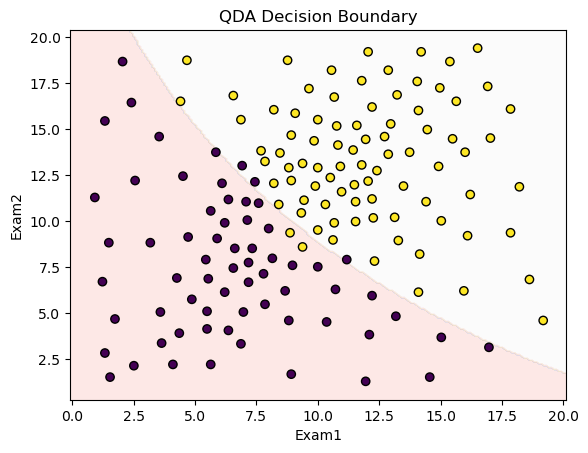

In [37]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create a QDA classifier
qda = QuadraticDiscriminantAnalysis()

# Fit the QDA classifier over the data
qda.fit(X, y)

# Use a meshgrid to visualize the decision boundary of the QDA Classifier
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
plt.scatter(X['Exam1'], X['Exam2'], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('QDA Decision Boundary')
plt.show()


In [38]:
# Calculate and print the accuracy of the QDA classifier
accuracy_qda = qda.score(X, y)
print(f'Accuracy of the QDA classifier: {accuracy_qda:.2f}')


Accuracy of the QDA classifier: 0.97


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


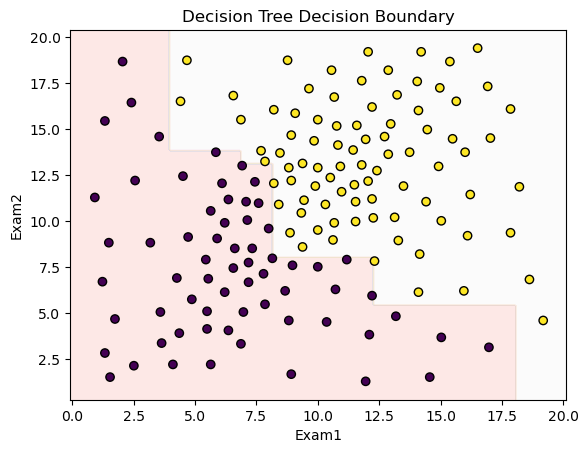

Accuracy of the Decision Tree Classifier: 1.00


In [39]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Fit the Decision Tree Classifier over the data
dtc.fit(X, y)

# Use a meshgrid to visualize the decision boundary of the Decision Tree Classifier
Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
plt.scatter(X['Exam1'], X['Exam2'], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Decision Tree Decision Boundary')
plt.show()

# Calculate and print the accuracy of the Decision Tree Classifier
accuracy_dtc = dtc.score(X, y)
print(f'Accuracy of the Decision Tree Classifier: {accuracy_dtc:.2f}')


In [41]:
# Predict the decision for a student with scores 19 and 0 using the Decision Tree Classifier
student_decision_dtc = dtc.predict(student_scores)
print(f'Decision for a student with scores 19 and 0 using Decision Tree: {"Accepted" if student_decision_dtc[0] == 1 else "Rejected"}')


Decision for a student with scores 19 and 0 using Decision Tree: Accepted


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---
# Decisision Tree Classifier

Same questions

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


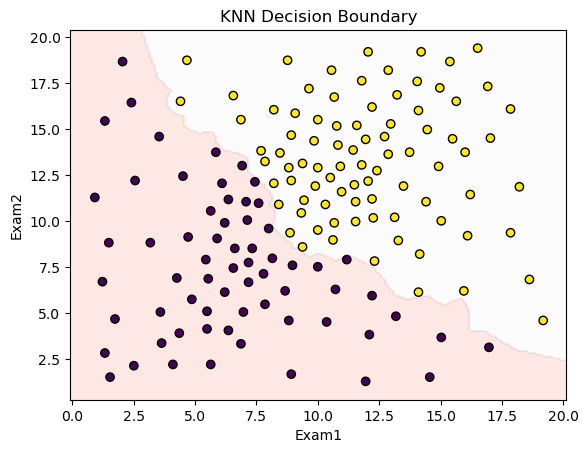

Accuracy of the KNN classifier: 1.00


In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier over the data
knn.fit(X, y)

# Use a meshgrid to visualize the decision boundary of the KNN Classifier
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
plt.scatter(X['Exam1'], X['Exam2'], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('KNN Decision Boundary')
plt.show()

# Calculate and print the accuracy of the KNN classifier
accuracy_knn = knn.score(X, y)
print(f'Accuracy of the KNN classifier: {accuracy_knn:.2f}')


In [43]:
# Predict the decision for a student with scores 19 and 0 using the KNN Classifier
student_decision_knn = knn.predict(student_scores)
print(f'Decision for a student with scores 19 and 0 using KNN: {"Accepted" if student_decision_knn[0] == 1 else "Rejected"}')


Decision for a student with scores 19 and 0 using KNN: Rejected


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [45]:
# Calculate and print the accuracy of the Decision Tree Classifier
accuracy_dtc = dtc.score(X, y)
print(f'Accuracy of the Decision Tree Classifier: {accuracy_dtc:.2f}')


Accuracy of the Decision Tree Classifier: 1.00


In [46]:
from sklearn import tree
text_representation = tree.export_text(dtc, feature_names=['Test1','Test2'])
print(text_representation)

|--- Test1 <= 8.18
|   |--- Test2 <= 13.14
|   |   |--- class: 0
|   |--- Test2 >  13.14
|   |   |--- Test1 <= 3.97
|   |   |   |--- class: 0
|   |   |--- Test1 >  3.97
|   |   |   |--- Test2 <= 13.80
|   |   |   |   |--- Test1 <= 6.85
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Test1 >  6.85
|   |   |   |   |   |--- class: 1
|   |   |   |--- Test2 >  13.80
|   |   |   |   |--- class: 1
|--- Test1 >  8.18
|   |--- Test2 <= 8.07
|   |   |--- Test1 <= 12.26
|   |   |   |--- class: 0
|   |   |--- Test1 >  12.26
|   |   |   |--- Test2 <= 5.50
|   |   |   |   |--- Test1 <= 18.07
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Test1 >  18.07
|   |   |   |   |   |--- class: 1
|   |   |   |--- Test2 >  5.50
|   |   |   |   |--- class: 1
|   |--- Test2 >  8.07
|   |   |--- class: 1



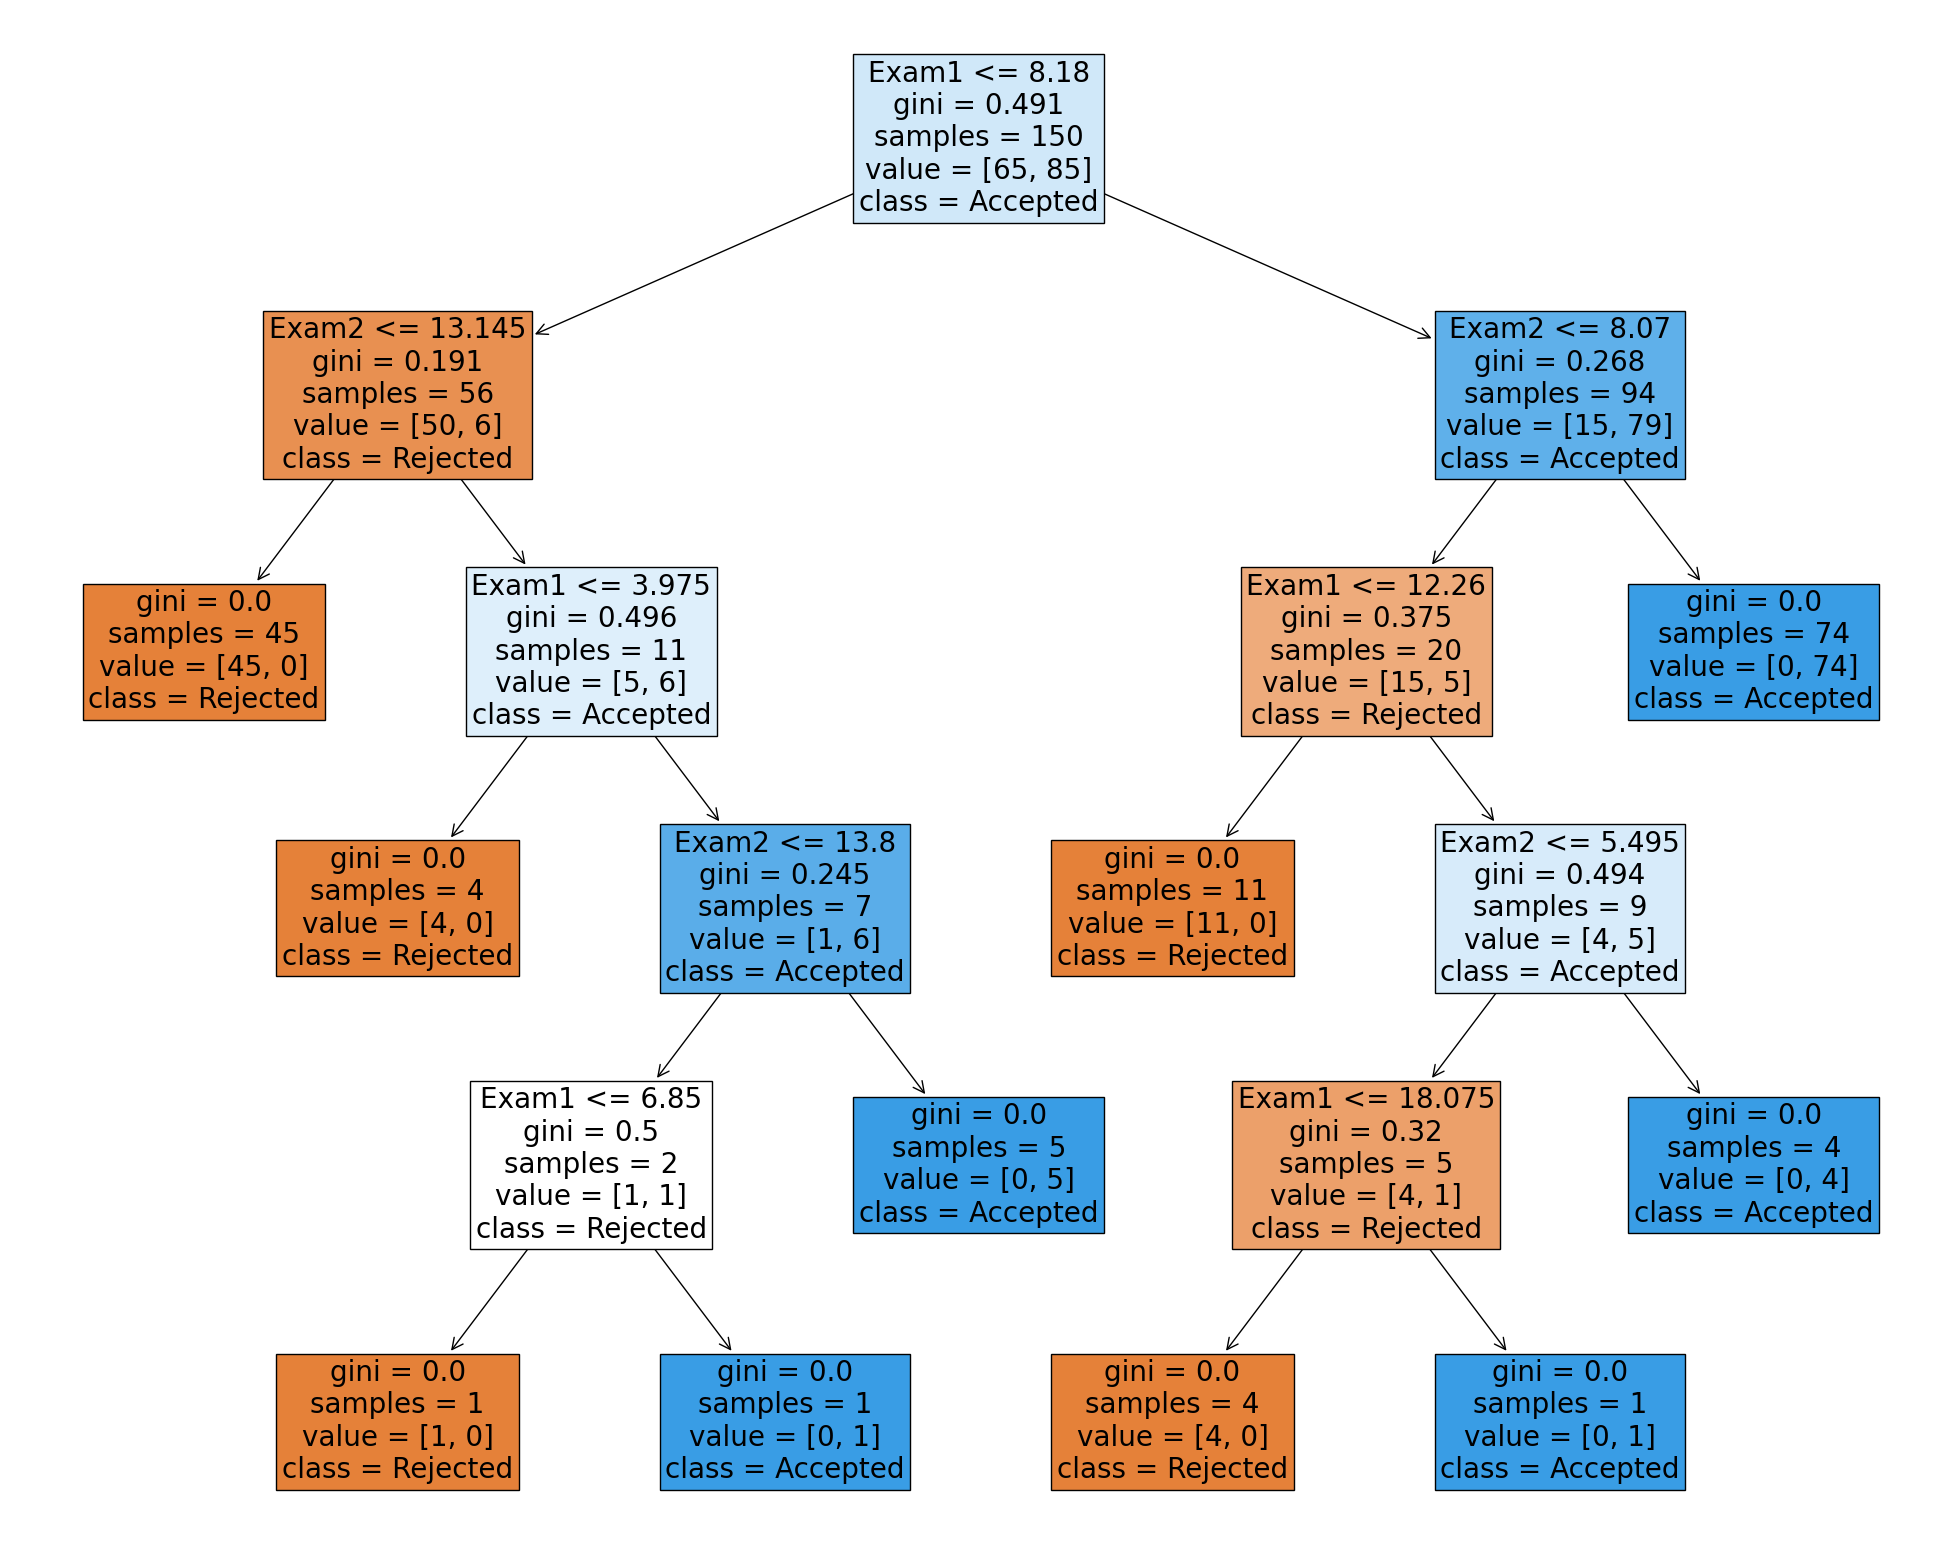

In [47]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=['Exam1','Exam2'],  
                   class_names=['Rejected', 'Accepted'],
                   fontsize = 20,
                   filled=True)


---

# K-Nearest Neighbors Classifier (KNN)

Same questions

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


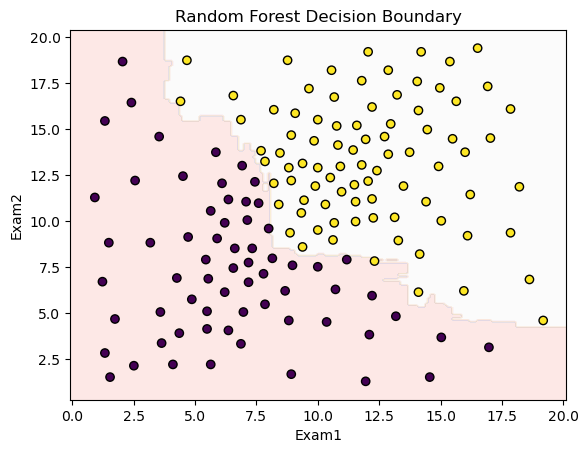

Accuracy of the Random Forest Classifier: 1.00


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rfc = RandomForestClassifier()

# Fit the Random Forest Classifier over the data
rfc.fit(X, y)

# Use a meshgrid to visualize the decision boundary of the Random Forest Classifier
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
plt.scatter(X['Exam1'], X['Exam2'], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Random Forest Decision Boundary')
plt.show()

# Calculate and print the accuracy of the Random Forest Classifier
accuracy_rfc = rfc.score(X, y)
print(f'Accuracy of the Random Forest Classifier: {accuracy_rfc:.2f}')


In [49]:
# Predict the decision for a student with scores 19 and 0 using the Random Forest Classifier
student_decision_rfc = rfc.predict(student_scores)
print(f'Decision for a student with scores 19 and 0 using Random Forest: {"Accepted" if student_decision_rfc[0] == 1 else "Rejected"}')


Decision for a student with scores 19 and 0 using Random Forest: Rejected


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
# Calculate and print the accuracy of the K-Nearest Neighbors (KNN) classifier
accuracy_knn = knn.score(X, y)
print(f'Accuracy of the KNN classifier: {accuracy_knn:.2f}')


Accuracy of the KNN classifier: 1.00


In [51]:
# Calculate and print the accuracy of the Random Forest Classifier
accuracy_rfc = rfc.score(X, y)
print(f'Accuracy of the Random Forest Classifier: {accuracy_rfc:.2f}')


Accuracy of the Random Forest Classifier: 1.00


---
# Random Forest Classifier

Same questions...

In [52]:

# Calculate and print the accuracy of the Random Forest Classifier
accuracy_rfc = rfc.score(X, y)
print(f'Accuracy of the Random Forest Classifier: {accuracy_rfc:.2f}')


Accuracy of the Random Forest Classifier: 1.00


In [53]:
# Calculate and print the accuracy of the Random Forest Classifier
accuracy_rfc = rfc.score(X, y)
print(f'Accuracy of the Random Forest Classifier: {accuracy_rfc:.2f}')


Accuracy of the Random Forest Classifier: 1.00


In [54]:
# Calculate and print the accuracy of the Random Forest Classifier
accuracy_rfc = rfc.score(X, y)
print(f'Accuracy of the Random Forest Classifier: {accuracy_rfc:.2f}')


Accuracy of the Random Forest Classifier: 1.00


In [56]:
# Calculate and print the accuracy of the Random Forest Classifier
accuracy_rfc = rfc.score(X, y)
print(f'Accuracy of the Random Forest Classifier: {accuracy_rfc:.2f}')


Accuracy of the Random Forest Classifier: 1.00
